## CREDIT RISK MODELLING CAPSTONE
For this project, I will be classifying whether a person is a defaulter or not.
Based on the csv that I have, I have a total of 139 features that includes age, occupation etc.
Let's begin

In [1]:
#Import the necessary libraries
import pandas as pd

In [2]:
data = pd.read_csv("TRAIN_DATA_AGRIC.csv")

In [3]:
data

,CIF_ID,ACCT_OPN_DATE,FORACID,MAX_DPD_BEFORE,NUMBER_OF_MONTHS_SINCE_OPEN,AGE,OCCUPATION,NUMBER_OF_MONTHS_ACTIVE_3Y_C,NUMBER_OF_MONTHS_ACTIVE_3Y_D,TRAN_AMT_25_PERCENTILE_3Y_C,...,FREQUENCY_1Y_max_i500kabove,MODE_BALANCE_BIN_1Y,PERC_CHANGE_AMT_2Y,REMITTANCE_MONTHS_0_12,REMITTANCE_MONTHS_13_24,REMITTANCE_MONTHS_25_36,RISK,optimal_predicted,probability_of_default,PREDICTED_SCORE
0,54303364670,2018-06-19,490577365253,14,116,55,OTH,36.0,36.0,19583.975,...,0.0,b0_1k,19.250294,12.0,12.0,12.0,0,0,0.122189,877.810901
1,54306108160,2018-06-19,920577362343,0,82,31,FARM,36.0,36.0,14713.975,...,0.0,b0_1k,-34.100255,12.0,12.0,12.0,0,0,0.206867,793.133253
2,54303951682,2018-06-14,490577353321,0,110,41,FARM,23.0,23.0,0.000,...,1.0,h100k_500k,5.963037,12.0,10.0,1.0,0,0,0.160443,839.556732
3,54300356513,2018-06-11,1090577340800,0,141,71,OTH,35.0,36.0,5286.875,...,0.0,b0_1k,-40.073165,12.0,12.0,11.0,0,0,0.133427,866.572602
4,54305312299,2018-06-21,490577372574,28,93,31,FARM,29.0,30.0,2589.500,...,0.0,b0_1k,-49.037705,12.0,11.0,6.0,1,1,0.638689,361.310534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14928,54307210797,2018-12-15,510578262153,11,80,54,FARM,33.0,35.0,863.563,...,0.0,b0_1k,6.380175,12.0,9.0,12.0,0,0,0.321194,678.806022
14929,54306725029,2018-12-17,530578349217,0,85,29,FARM,36.0,36.0,29346.212,...,7.0,b0_1k,-12.411933,12.0,12.0,12.0,0,0,0.093885,906.115410
14930,54308363457,2018-12-24,190578463167,0,60,41,OTH,36.0,36.0,1270.688,...,0.0,b0_1k,-0.399648,12.0,12.0,12.0,0,0,0.131587,868.412594
14931,54200425672,2018-12-14,70578259827,0,158,72,OTHER,36.0,36.0,1737.450,...,0.0,b0_1k,-6.876600,12.0,12.0,12.0,0,0,0.158602,841.397858


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14933 entries, 0 to 14932
Columns: 139 entries, CIF_ID to PREDICTED_SCORE
dtypes: float64(125), int64(8), object(6)
memory usage: 15.8+ MB


The above data has 139 features. 133 numerical features and 6 categorical features.
What we will do after this is describe the data statistically|

In [5]:
pd.set_option('display.float_format', '{:.1f}'.format)
data.describe()

,CIF_ID,FORACID,MAX_DPD_BEFORE,NUMBER_OF_MONTHS_SINCE_OPEN,AGE,NUMBER_OF_MONTHS_ACTIVE_3Y_C,NUMBER_OF_MONTHS_ACTIVE_3Y_D,TRAN_AMT_25_PERCENTILE_3Y_C,TRAN_AMT_25_PERCENTILE_3Y_D,TRAN_AMT_3Y_C,...,FREQUENCY_1Y_max_h100k_500k,FREQUENCY_1Y_max_i500kabove,PERC_CHANGE_AMT_2Y,REMITTANCE_MONTHS_0_12,REMITTANCE_MONTHS_13_24,REMITTANCE_MONTHS_25_36,RISK,optimal_predicted,probability_of_default,PREDICTED_SCORE
count,14933.0,14933.0,14933.0,14933.0,14933.0,14933.0,14933.0,14933.0,14933.0,14933.0,...,14933.0,14933.0,14933.0,14933.0,14933.0,14933.0,14933.0,14933.0,14933.0,14933.0
mean,54281341764.5,366578013043.8,19.7,118.3,47.5,33.0,33.6,4434.3,3997.2,714054.8,...,3.1,0.3,82.6,11.5,11.0,10.5,0.3,0.4,0.3,686.3
std,43020626.5,366485690887.4,51.3,36.3,12.7,6.1,5.8,34020.7,30315.3,2369958.9,...,8.0,2.7,867.3,1.4,2.5,3.3,0.5,0.5,0.2,209.8
min,54200006812.0,20577778434.0,0.0,3.0,19.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-98.2,0.0,0.0,0.0,0.0,0.0,0.0,104.1
25%,54300153952.0,70578048147.0,0.0,94.0,38.0,33.0,35.0,688.8,110.8,186427.4,...,0.0,0.0,-20.9,12.0,11.0,11.0,0.0,0.0,0.1,532.6
50%,54302689684.0,210577795654.0,11.0,127.0,46.0,36.0,36.0,1545.3,793.8,353335.7,...,0.0,0.0,4.2,12.0,12.0,12.0,0.0,0.0,0.3,726.0
75%,54305562285.0,520578149266.0,15.0,151.0,57.0,36.0,36.0,3464.4,2645.2,685333.7,...,0.0,0.0,39.3,12.0,12.0,12.0,1.0,1.0,0.5,864.9
max,54312668548.0,1790577835500.0,1750.0,158.0,100.0,36.0,36.0,3571365.7,2874994.6,180014404.7,...,31.0,31.0,58595.5,12.0,12.0,12.0,1.0,1.0,0.9,992.8


Now lets look for any missing values in the dataset

In [6]:
data.isnull().sum()

CIF_ID                         0
ACCT_OPN_DATE                  0
FORACID                        0
MAX_DPD_BEFORE                 0
NUMBER_OF_MONTHS_SINCE_OPEN    0
                              ..
REMITTANCE_MONTHS_25_36        0
RISK                           0
optimal_predicted              0
probability_of_default         0
PREDICTED_SCORE                0
Length: 139, dtype: int64

As we can see, We have no null values in our dataset

Lets now separate categorical from numerical data

In [7]:
#First we need to convert datetime from object to numerical
data['ACCT_OPN_DATE'] = pd.to_datetime(data['ACCT_OPN_DATE']).astype(int)

In [8]:
numerical = data.select_dtypes(include=['int','float'])
numerical.head()

,CIF_ID,ACCT_OPN_DATE,FORACID,MAX_DPD_BEFORE,NUMBER_OF_MONTHS_SINCE_OPEN,AGE,NUMBER_OF_MONTHS_ACTIVE_3Y_C,NUMBER_OF_MONTHS_ACTIVE_3Y_D,TRAN_AMT_25_PERCENTILE_3Y_C,TRAN_AMT_25_PERCENTILE_3Y_D,...,FREQUENCY_1Y_max_h100k_500k,FREQUENCY_1Y_max_i500kabove,PERC_CHANGE_AMT_2Y,REMITTANCE_MONTHS_0_12,REMITTANCE_MONTHS_13_24,REMITTANCE_MONTHS_25_36,RISK,optimal_predicted,probability_of_default,PREDICTED_SCORE
0,54303364670,1529366400000000000,490577365253,14,116,55,36.0,36.0,19584.0,20362.4,...,26.0,0.0,19.3,12.0,12.0,12.0,0,0,0.1,877.8
1,54306108160,1529366400000000000,920577362343,0,82,31,36.0,36.0,14714.0,11121.8,...,0.0,0.0,-34.1,12.0,12.0,12.0,0,0,0.2,793.1
2,54303951682,1528934400000000000,490577353321,0,110,41,23.0,23.0,0.0,0.0,...,31.0,1.0,6.0,12.0,10.0,1.0,0,0,0.2,839.6
3,54300356513,1528675200000000000,1090577340800,0,141,71,35.0,36.0,5286.9,4920.5,...,0.0,0.0,-40.1,12.0,12.0,11.0,0,0,0.1,866.6
4,54305312299,1529539200000000000,490577372574,28,93,31,29.0,30.0,2589.5,150.0,...,0.0,0.0,-49.0,12.0,11.0,6.0,1,1,0.6,361.3


In [9]:
categorical = data.select_dtypes(include=['object'])
categorical.head()

,OCCUPATION,MODE_BALANCE_BIN_3Y,SEGMENTATION_CLASS,SUBSEGMENT,MODE_BALANCE_BIN_1Y
0,OTH,b0_1k,RETAIL,LOWER MIDDLE INCOME 2,b0_1k
1,FARM,b0_1k,RETAIL,LOW INCOME 1,b0_1k
2,FARM,b0_1k,RETAIL,LOWER MIDDLE INCOME 2,h100k_500k
3,OTH,b0_1k,RETAIL,LOWER MIDDLE INCOME 2,b0_1k
4,FARM,b0_1k,RETAIL,LOW INCOME 1,b0_1k


We have managed to split our data into categorical and numerical types

## EXPLORATORY DATA ANALYSIS
Lets what this data is all about
First, we start by checking the age distribution of people who take up loans

In [10]:
numerical['AGE'].min()

19

Text(0.5, 1.0, 'Age Frequency Distribution')

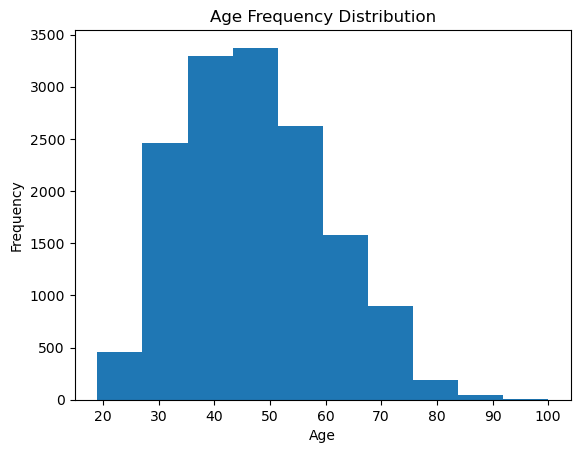

In [11]:
import matplotlib.pyplot as plt
plt.hist(data['AGE'],bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Frequency Distribution')

We can see that there is a high number of people between the age of 30 and 60 who take up loans

Now lets try and see which age group has the most amount of transactional accounts

In [12]:
data1 = data.copy()
bins = [0,9,19,29,39,49,59,69,79,89,99]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
data1['AGE'] = pd.cut(data1['AGE'],bins=bins,labels=labels,right=False)

#We will group by age group and calculate the average number of transactional accounts
result = data1.groupby('AGE')['NO_OF_TRANSACTIONAL_ACCTS'].mean().reset_index()

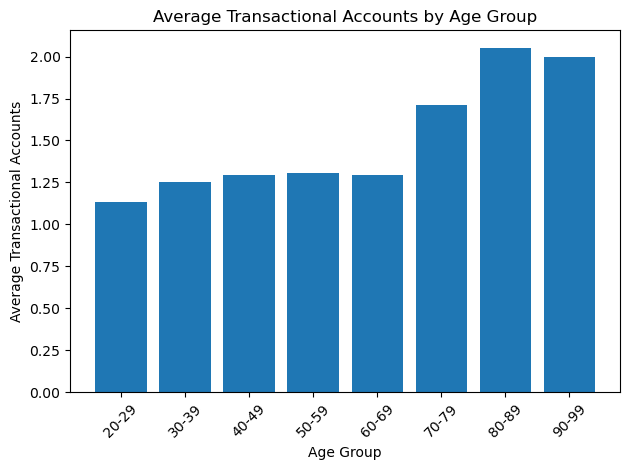

In [13]:
#Lets visualize
plt.figure()
plt.bar(result['AGE'],result['NO_OF_TRANSACTIONAL_ACCTS'])
plt.xlabel('Age Group')
plt.ylabel('Average Transactional Accounts')
plt.title('Average Transactional Accounts by Age Group')

# Show the plot
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()


We can now look at the annual income in the age groups

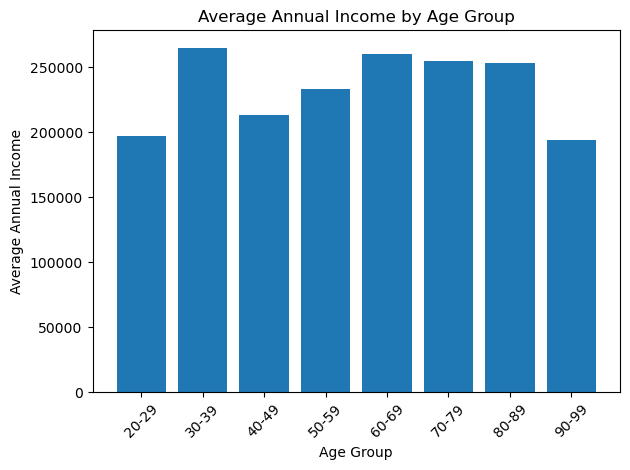

In [14]:
income = data1.groupby('AGE')['AVG_ANNUAL_INCOME(3Y)'].mean().reset_index()
#Lets visualize
plt.figure()
plt.bar(income['AGE'],income['AVG_ANNUAL_INCOME(3Y)'])
plt.xlabel('Age Group')
plt.ylabel('Average Annual Income')
plt.title('Average Annual Income by Age Group')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

With that minimal data exploratory analysis, Let's move on

## DATA PREPROCESSING

In [15]:
categorical['SEGMENTATION_CLASS'].unique()

array(['RETAIL', 'BUSINESS', 'CONSM', 'AGRIC', 'OTHER', 'MICRO'],
      dtype=object)

In [16]:
categorical['SUBSEGMENT'].unique()

array(['LOWER MIDDLE INCOME 2', 'LOW INCOME  1', 'BUSINESS MICRO 1',
       'CONSA', 'UPPER MIDDLE INCOME 3', 'AGRCA', 'BUSINESS LOWER SME 2',
       'HIGH NET WORTH 4', 'OTHER', 'AGRCB', 'MICRB', 'CONSB'],
      dtype=object)

In [17]:
categorical['MODE_BALANCE_BIN_1Y'].unique()

array(['b0_1k', 'h100k_500k', 'd5k_10k', 'c1_5k', 'g50k_100k', 'e10k_25k',
       '0', 'a_less_than_0', 'f25k_50k', 'i500kabove'], dtype=object)

In [18]:
categorical['MODE_BALANCE_BIN_3Y'].unique()

array(['b0_1k', 'h100k_500k', 'c1_5k', 'g50k_100k', 'e10k_25k', '0',
       'f25k_50k', 'd5k_10k', 'a_less_than_0', 'i500kabove'], dtype=object)

We are going top perform onehot encoding on our categorical data

In [19]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False,drop='first')
encoded_data = encoder.fit_transform(categorical)

encoded_df = pd.DataFrame(encoded_data,columns=encoder.get_feature_names_out(categorical.columns))
encoded_df

/home/roy/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,OCCUPATION_ADMIN,OCCUPATION_ARTIS,OCCUPATION_AUD,OCCUPATION_BNESS,OCCUPATION_CIVIL,OCCUPATION_CLERI,OCCUPATION_CLRGY,OCCUPATION_CONST,OCCUPATION_CPTR,OCCUPATION_CTR,...,SUBSEGMENT_UPPER MIDDLE INCOME 3,MODE_BALANCE_BIN_1Y_a_less_than_0,MODE_BALANCE_BIN_1Y_b0_1k,MODE_BALANCE_BIN_1Y_c1_5k,MODE_BALANCE_BIN_1Y_d5k_10k,MODE_BALANCE_BIN_1Y_e10k_25k,MODE_BALANCE_BIN_1Y_f25k_50k,MODE_BALANCE_BIN_1Y_g50k_100k,MODE_BALANCE_BIN_1Y_h100k_500k,MODE_BALANCE_BIN_1Y_i500kabove
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14931,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
data_ML = data.copy()
data_ML = pd.concat([data_ML.drop(categorical,axis=1),encoded_df],axis=1)

In [21]:
data_ML.select_dtypes(include='object')

""
0
1
2
3
4
...
14928
14929
14930
14931


## MODEL SELECTION

We will be predicting if a person is likely ro default on the loan he/she is given.
This makes this a classification problem. We will go through all possible classification algorithms and find the suitable one

In [22]:
data_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14933 entries, 0 to 14932
Columns: 202 entries, CIF_ID to MODE_BALANCE_BIN_1Y_i500kabove
dtypes: float64(193), int64(9)
memory usage: 23.0 MB


Let's prepare our data for modelling.
We will be using K fold method to split and train our data

In [23]:
X = data_ML.drop(columns=['optimal_predicted'])
y = data_ML['optimal_predicted']

In [24]:
X['AGE']

0        55
1        31
2        41
3        71
4        31
         ..
14928    54
14929    29
14930    41
14931    72
14932    42
Name: AGE, Length: 14933, dtype: int64

In [25]:
X.isnull().sum()

CIF_ID                            0
ACCT_OPN_DATE                     0
FORACID                           0
MAX_DPD_BEFORE                    0
NUMBER_OF_MONTHS_SINCE_OPEN       0
                                 ..
MODE_BALANCE_BIN_1Y_e10k_25k      0
MODE_BALANCE_BIN_1Y_f25k_50k      0
MODE_BALANCE_BIN_1Y_g50k_100k     0
MODE_BALANCE_BIN_1Y_h100k_500k    0
MODE_BALANCE_BIN_1Y_i500kabove    0
Length: 201, dtype: int64

In [27]:
from sklearn.model_selection import KFold
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score
#Function to train and test model

def train_model(X,y,model,folds):
    global y_test,y_train,y_pred
    resultAS , resultPS,resultRS,resultf1 = [],[],[],[]
    kf = KFold(n_splits=folds,shuffle=True,random_state=50)
    for train_index,test_index in kf.split(X):
        X_train,X_test = X.iloc[train_index],X.iloc[test_index]
        y_train,y_test = y.iloc[train_index],y.iloc[test_index]
        
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        accuracyScore = accuracy_score(y_test,y_pred)
        resultAS.append(accuracyScore)
        precisionScore = precision_score(y_test,y_pred)
        resultPS.append(precisionScore)
        recall = recall_score(y_test,y_pred)
        resultRS.append(recall)
        f1 = f1_score(y_test,y_pred)
        resultf1.append(f1)
    print("Accuracy score for Each fold using accuracy score: ",resultAS)
    print("Mean Accuracy:", np.mean(resultAS))
    print("Standard Deviation: ", np.std(resultAS))
    print("Accuracy score for Each fold using precision score: ",resultPS)
    print("Mean Accuracy:", np.mean(resultPS))
    print("Standard Deviation: ", np.std(resultPS))
    print("Accuracy score for Each fold using recall score: ",resultRS)
    print("Mean Accuracy:", np.mean(resultRS))
    print("Standard Deviation: ", np.std(resultRS))
    print("Accuracy score for Each fold using F1 score: ",resultf1)
    print("Mean Accuracy:", np.mean(resultf1))
    print("Standard Deviation: ", np.std(resultf1))
    cnf_matrix = confusion_matrix(y_test,y_pred,labels=[1,0])
    plt.figure()
    plot_confusion_matrix(cnf_matrix,labels=['0','1'])
        

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
def plot_confusion_matrix(conf_matrix,labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [29]:
#Function to test model
def test_model(model,X_test,y_test):
    y_pred = model.predict(X_test)
    resultAS = accuracy_score(y_test,y_pred)
    resultPS = precision_score(y_test,y_pred)
    resultRS = recall_score(y_test,y_pred)
    resultf1 = f1_score(y_test,y_pred)
    print("Test accuracy using accuracy score: ",resultAS)
    print("Test accuracy using precision score: ",resultPS)
    print("Test accuracy using recall score: ",resultRS)
    print("Test acuracy using F1 score: ",resultf1)
    cnf_matrix = confusion_matrix(y_test,y_pred,labels=[1,0])
    plt.figure()
    plot_confusion_matrix(cnf_matrix,labels=['0','1'])

Lets start with random forest classifier

Accuracy score for Each fold using accuracy score:  [0.9976565115500502, 1.0, 0.9996652159357214, 1.0, 0.9996651038178165]
Mean Accuracy: 0.9993973662607176
Standard Deviation:  0.0008832142230486109
Accuracy score for Each fold using precision score:  [0.9983079526226735, 1.0, 1.0, 1.0, 0.9992181391712275]
Mean Accuracy: 0.9995052183587803
Standard Deviation:  0.0006708630739943291
Accuracy score for Each fold using recall score:  [0.9957805907172996, 1.0, 0.999198717948718, 1.0, 1.0]
Mean Accuracy: 0.9989958617332035
Standard Deviation:  0.0016373148338923453
Accuracy score for Each fold using F1 score:  [0.9970426700464724, 1.0, 0.9995991983967936, 1.0, 0.999608916699257]
Mean Accuracy: 0.9992501570285046
Standard Deviation:  0.001117861003683296


<Figure size 640x480 with 0 Axes>

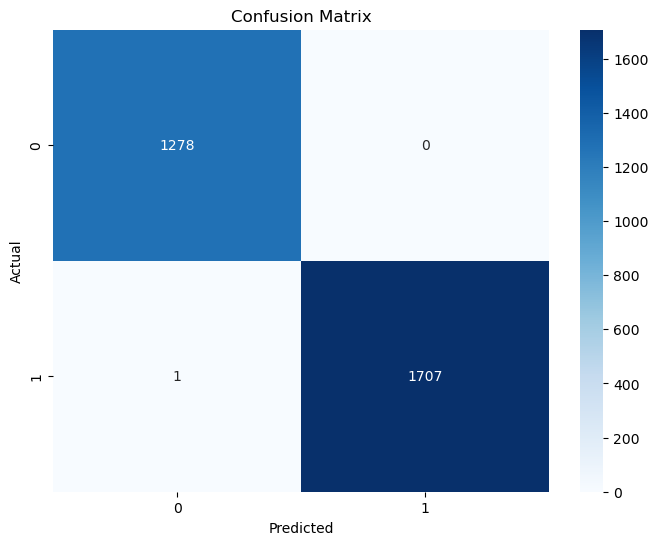

In [30]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=5,min_samples_leaf=5,random_state=5)
train_model(X=X,y=y,model=model,folds=5)


It seems like we have an imbalance in our dataset.
Our model predicts and has a 99% accuracy which is unrealistic.
We are required to balance our dataset using SMOTEEN

<AxesSubplot: >

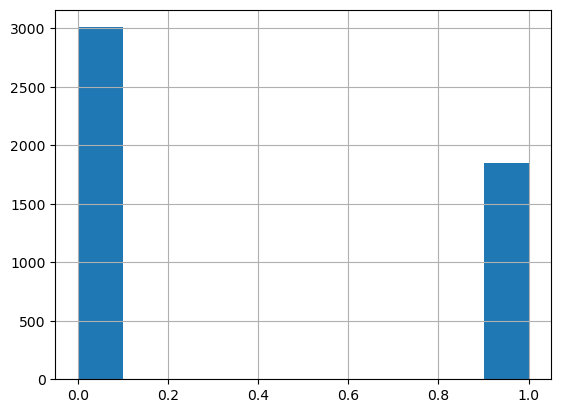

In [31]:
from imblearn.combine import SMOTEENN

smoteenn_sample = SMOTEENN(random_state=100,sampling_strategy='auto')
X_res,y_res = smoteenn_sample.fit_resample(X,y)
y_res.hist()

SMOTEEN is a combination of SMOTE(Synthetic Minority Over-sampling Technique) ,which is an oversampling technique, and ENN(Edited Nearest Neighbour) which is an undersampling technique.
It gives an effective balance between the two datasets

Accuracy score for Each fold using accuracy score:  [1.0, 0.9979402677651905, 1.0, 0.9989701338825953, 0.9989690721649485]
Mean Accuracy: 0.9991758947625466
Standard Deviation:  0.0007707380992252894
Accuracy score for Each fold using precision score:  [1.0, 0.997289972899729, 1.0, 1.0, 1.0]
Mean Accuracy: 0.9994579945799458
Standard Deviation:  0.001084010840108407
Accuracy score for Each fold using recall score:  [1.0, 0.997289972899729, 1.0, 0.9972067039106145, 0.9971590909090909]
Mean Accuracy: 0.9983311535438869
Standard Deviation:  0.0013632514015824728
Accuracy score for Each fold using F1 score:  [1.0, 0.997289972899729, 1.0, 0.9986013986013986, 0.9985775248933144]
Mean Accuracy: 0.9988937792788886
Standard Deviation:  0.0010203084598718111


<Figure size 640x480 with 0 Axes>

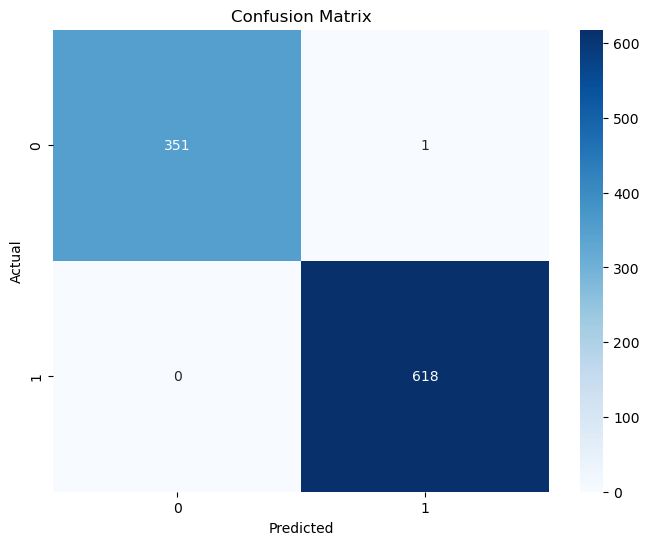

In [35]:
model = RandomForestClassifier(max_depth=5,min_samples_leaf=5,random_state=5)
train_model(X=X_res,y=y_res,model=model,folds=5)

Lets use another classification algorithms

Accuracy score for Each fold using accuracy score:  [0.9629629629629629, 0.9506172839506173, 0.9753086419753086, 0.9567901234567902, 0.9814814814814815, 0.9691358024691358, 0.9691358024691358, 0.9814814814814815, 0.9691358024691358, 0.9938271604938271, 0.9814814814814815, 0.9691358024691358, 0.9691358024691358, 0.9876543209876543, 0.9753086419753086, 0.9753086419753086, 0.9814814814814815, 0.9691358024691358, 0.9506172839506173, 0.9814814814814815, 0.9876543209876543, 0.9691358024691358, 0.9876543209876543, 0.9753086419753086, 0.9627329192546584, 0.9627329192546584, 0.9627329192546584, 0.9627329192546584, 0.9627329192546584, 0.9751552795031055]
Mean Accuracy: 0.9719730082048924
Standard Deviation:  0.010691245422697518
Accuracy score for Each fold using precision score:  [0.9692307692307692, 0.9538461538461539, 0.9516129032258065, 0.9508196721311475, 1.0, 0.9836065573770492, 0.9428571428571428, 0.9836065573770492, 0.9830508474576272, 0.9848484848484849, 0.9827586206896551, 0.9629629629

<Figure size 640x480 with 0 Axes>

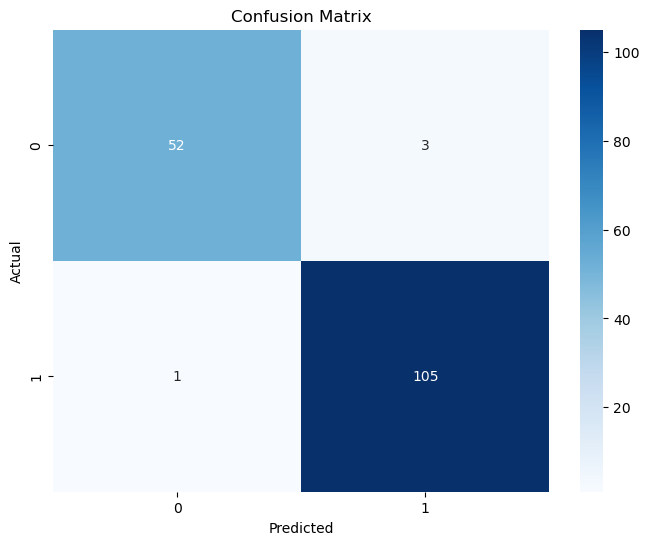

In [33]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=1000,random_state=40,min_samples_leaf=10,max_depth=100)
train_model(X=X_res,y=y_res,model=model,folds=30)

By balancing our dataset using SMOTEENN, we can now get a more accurate model with 96% accuracy